<a href="https://colab.research.google.com/github/MarkusNeusinger/defichain-data-toolkit/blob/main/notebooks/daily_dfi_burn_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily DFI Burn/Emission, 7 day moving avg

In [26]:
import os, sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from google.colab import files

# import defichain-data-toolkit utils, style
if os.path.isdir('defichain-data-toolkit'): os.system('rm -rf defichain-data-toolkit')
!git clone https://github.com/MarkusNeusinger/defichain-data-toolkit.git
sys.path.insert(1, 'defichain-data-toolkit')

from utils import fetch_history
plt.style.use('/content/defichain-data-toolkit/utils/defichain.mplstyle')

print(f"\nNotebook last run: {datetime.utcnow()}")

Cloning into 'defichain-data-toolkit'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 69 (delta 23), reused 30 (delta 9), pack-reused 0
Receiving objects: 100% (69/69), 1.99 MiB | 6.14 MiB/s, done.
Resolving deltas: 100% (23/23), done.

Notebook last run: 2023-09-29 19:06:50.607086


In [27]:
# fetching data, last 90 days
df = fetch_history('daily', ['Height', 'EmissionTotal', 'BurnedTotal'],
                   from_timestamp=(datetime.utcnow() - timedelta(days=90)).strftime("%Y-%m-%dT%H:%M:%S"))
df.sort_values('datetime_utc', ascending=True, inplace=True)
df.head()

100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


,datetime_utc,burnedtotal,height,emissiontotal
0,2023-07-02,3.176505e+08,3.071326e+06,134.361336
1,2023-07-03,3.176526e+08,3.074175e+06,134.361336
2,2023-07-04,3.176527e+08,3.077067e+06,134.361336
3,2023-07-05,3.176528e+08,3.079920e+06,134.361336
4,2023-07-06,3.176529e+08,3.082837e+06,134.329360


In [28]:
# calculate 1day diff
df['time_diff'] = df['datetime_utc'].diff().dt.total_seconds()
df['height_diff'] = df['height'].diff()
df['burn_diff'] = df['burnedtotal'].diff()

# drop rows with diff > 1day or nan
df = df[df['time_diff'] == 86400].copy()
df['emission'] = df['emissiontotal'] * df['height_diff']
df['burn'] = df['burn_diff']

# calculate 7 day moving avg
df['burn_7day_avg'] = df['burn'].rolling(window=7).mean()
df['emission_7day_avg'] = df['emission'].rolling(window=7).mean()

# drop nan
df.dropna(inplace=True)

df.tail()

,datetime_utc,burnedtotal,height,emissiontotal,time_diff,height_diff,burn_diff,emission,burn,burn_7day_avg,emission_7day_avg
85,2023-09-25,3.177660e+08,3.315787e+06,117.540249,86400.0,2880.576837,12462.089970,338583.718445,12462.089970,2247.704826,343827.128724
86,2023-09-26,3.177791e+08,3.318618e+06,117.540249,86400.0,2830.687846,13098.027993,332719.753917,13098.027993,3662.635309,340338.155068
87,2023-09-27,3.177801e+08,3.321523e+06,117.540249,86400.0,2905.646953,998.997571,341530.466104,998.997571,3801.477528,340413.889182
88,2023-09-28,3.177801e+08,3.324483e+06,117.540249,86400.0,2959.290487,3.434075,347835.740382,3.434075,3801.550847,340963.904113
89,2023-09-29,3.177801e+08,3.327042e+06,117.540249,86400.0,2559.267635,2.964726,300816.954803,2.964726,3801.213534,334594.224574


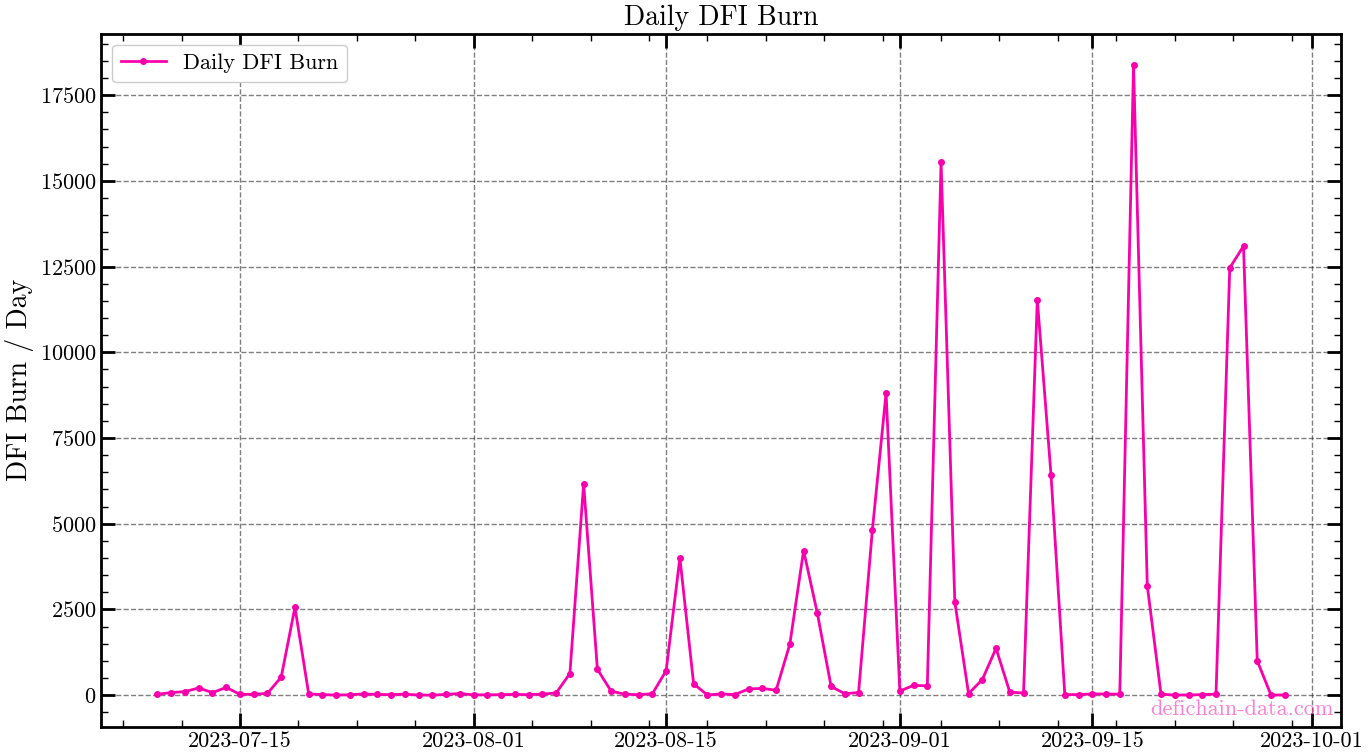

In [29]:
# Plotting Daily burn
fig, axs = plt.subplots()

axs.plot(df['datetime_utc'], df['burn'], label='Daily DFI Burn', marker='o')

axs.set_title('Daily DFI Burn')
axs.set_ylabel('DFI Burn / Day')
axs.legend()

axs.text(0.92, 0.025, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=16, color='#F800AB', alpha=0.5)

plt.savefig('Daily_DFI_Burn.png')
plt.show()

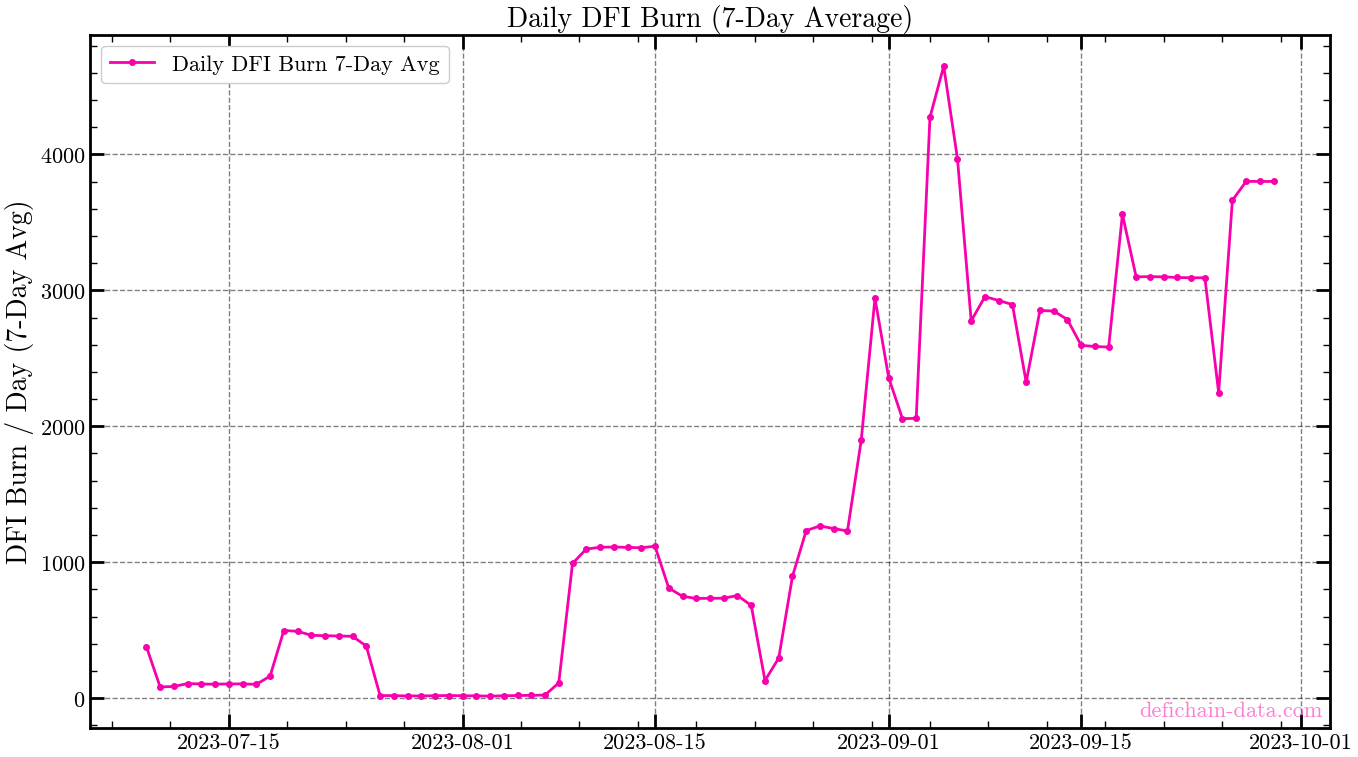

In [30]:
# Plotting Daily 7-day average burn
fig, axs = plt.subplots()

axs.plot(df['datetime_utc'], df['burn_7day_avg'], marker='o', label='Daily DFI Burn 7-Day Avg')

axs.set_title('Daily DFI Burn (7-Day Average)')
axs.set_ylabel('DFI Burn / Day (7-Day Avg)')
axs.legend(loc='upper left')

axs.text(0.92, 0.025, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=16, color='#F800AB', alpha=0.5)

plt.savefig('Daily_DFI_Burn_7day.png')
plt.show()

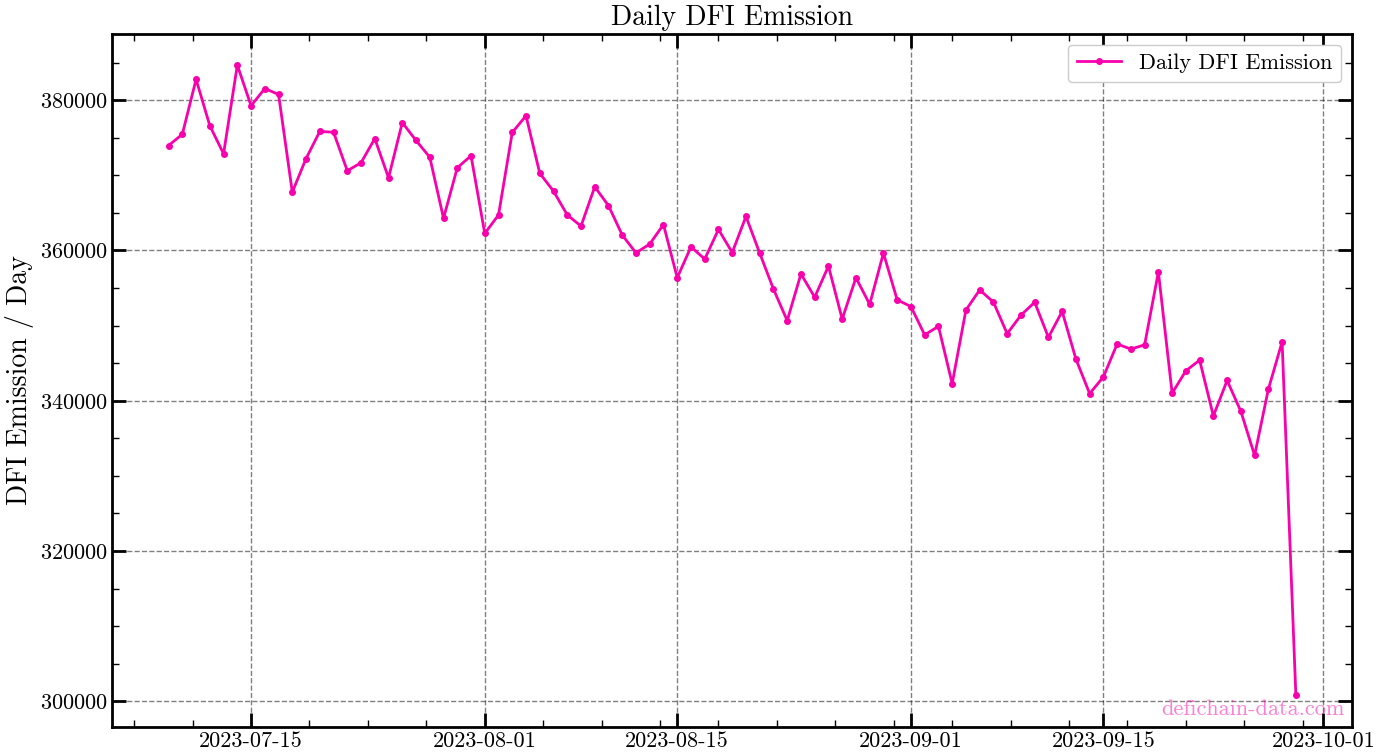

In [31]:
# Plotting Daily Emission
fig, axs = plt.subplots()

axs.plot(df['datetime_utc'], df['emission'], marker='o', label='Daily DFI Emission')

axs.set_title('Daily DFI Emission')
axs.set_ylabel('DFI Emission / Day')
axs.legend()

axs.text(0.92, 0.025, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=16, color='#F800AB', alpha=0.5)

plt.savefig('Daily_DFI_Emission.png')
plt.show()

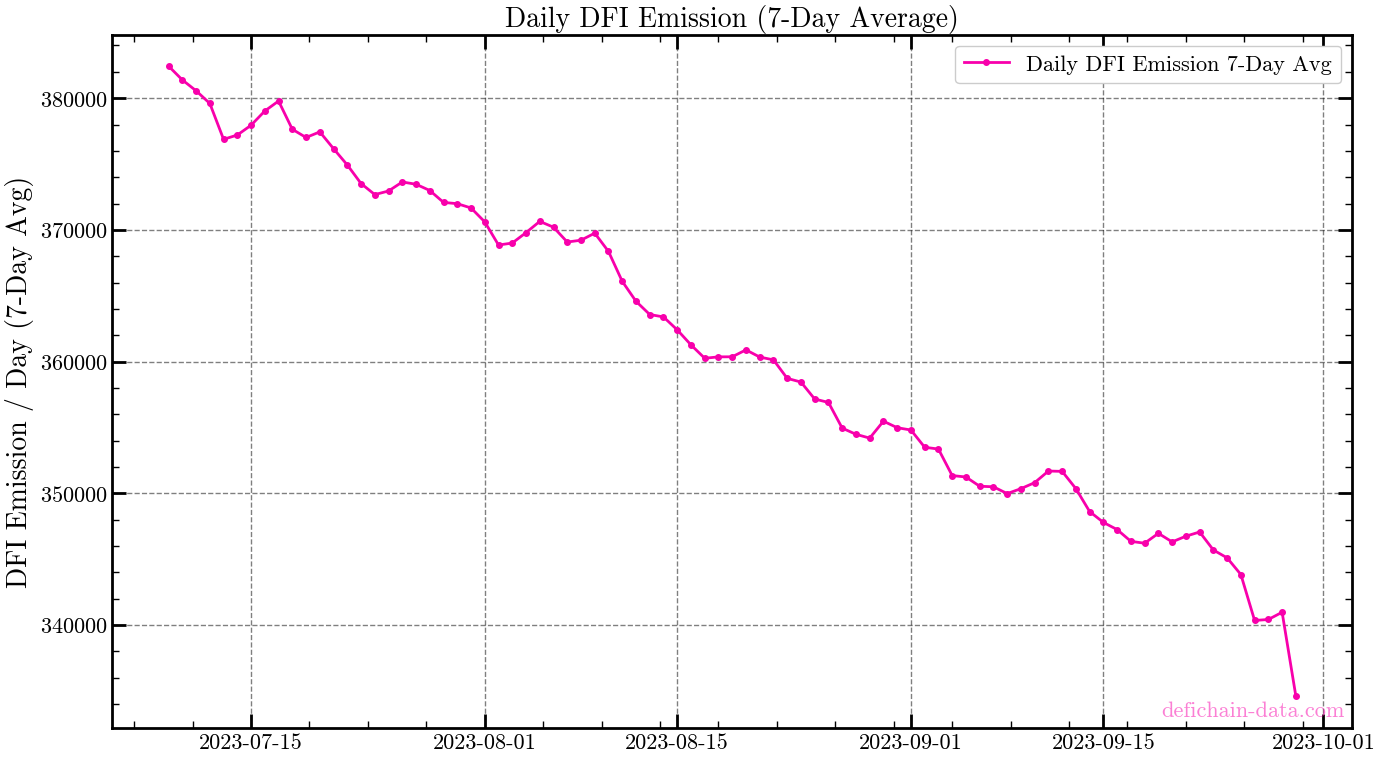

In [32]:
# Plotting Daily 7-Day Avg Emission
fig, axs = plt.subplots()

axs.plot(df['datetime_utc'], df['emission_7day_avg'], marker='o', label='Daily DFI Emission 7-Day Avg')

axs.set_title('Daily DFI Emission (7-Day Average)')
axs.set_ylabel('DFI Emission / Day (7-Day Avg)')
axs.legend()

axs.text(0.92, 0.025, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=16, color='#F800AB', alpha=0.5)

plt.savefig('Daily_DFI_Emission_7day.png')
plt.show()

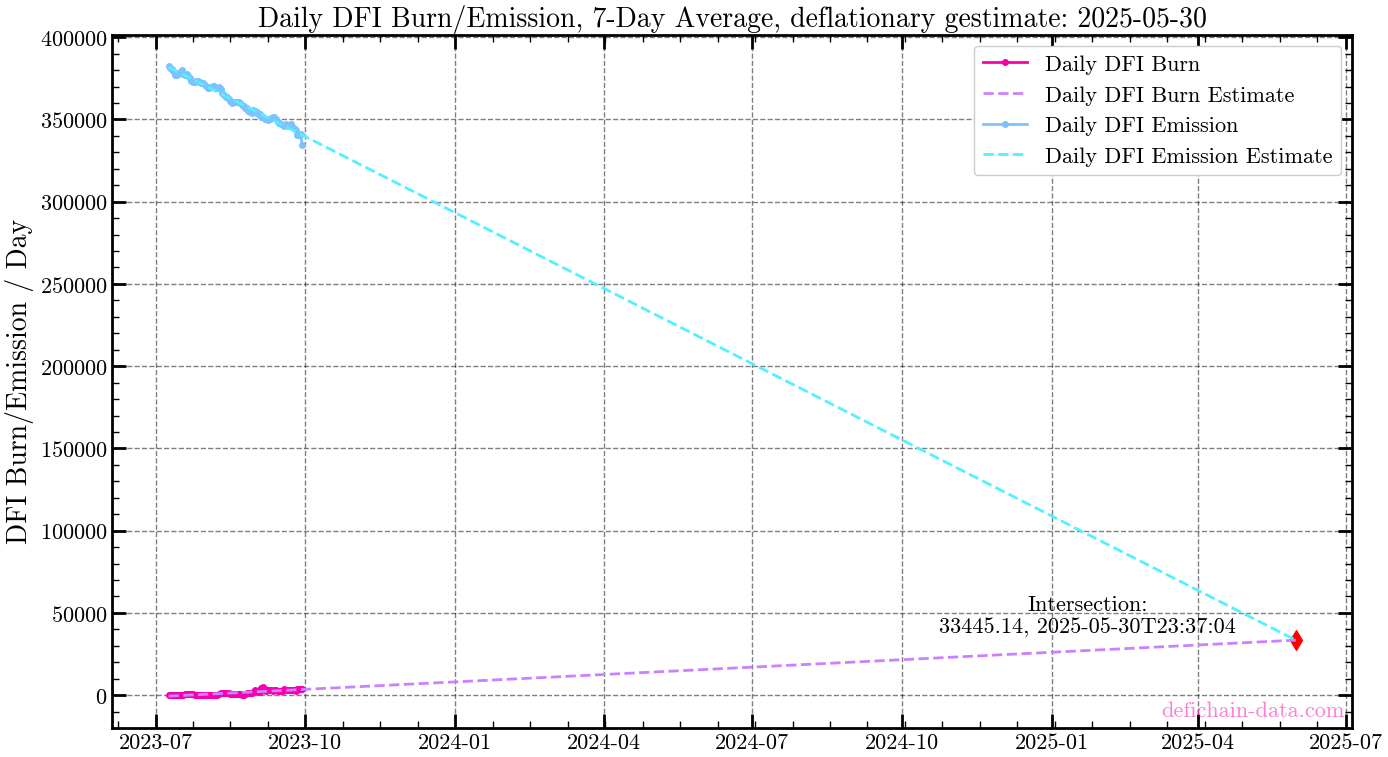

In [33]:
# Plotting Daily Burn/Emission gestimate

# Linear fit for burn
z1 = np.polyfit(pd.to_datetime(df['datetime_utc']).astype('int64'), df['burn_7day_avg'], 1)
p1 = np.poly1d(z1)

# Linear fit for emission
z2 = np.polyfit(pd.to_datetime(df['datetime_utc']).astype('int64'), df['emission_7day_avg'], 1)
p2 = np.poly1d(z2)

# Finding intersection
intersection_x = np.roots(p1 - p2)[0]
intersection_date = pd.to_datetime(intersection_x, unit='ns')
intersection_y = p1(intersection_x)

# Create extended datetime range
min_date = min(pd.to_datetime(df['datetime_utc']).astype('int64'))
max_date = max(pd.to_datetime(df['datetime_utc']).astype('int64'))
extended_range = np.linspace(min_date, max(intersection_x, max_date), 100)

# Plot
fig, axs = plt.subplots()

axs.plot(df['datetime_utc'], df['burn_7day_avg'], marker='o', label='Daily DFI Burn')
axs.plot(pd.to_datetime(extended_range, unit='ns'), p1(extended_range), linestyle='--', label='Daily DFI Burn Estimate')

axs.plot(df['datetime_utc'], df['emission_7day_avg'], marker='o', label='Daily DFI Emission')
axs.plot(pd.to_datetime(extended_range, unit='ns'), p2(extended_range), linestyle='--', label='Daily DFI Emission Estimate')

# Marking intersection
axs.scatter(intersection_date, intersection_y, color='red', marker='d', s=100)
axs.annotate(f'Intersection:\n{intersection_y:.2f}, {intersection_date.strftime("%Y-%m-%dT%H:%M:%S")}',
             (intersection_date, intersection_y), textcoords="offset points", xytext=(-150,5), ha='center', fontsize=16)

# Remaining plot settings
axs.set_title(f'Daily DFI Burn/Emission, 7-Day Average, deflationary gestimate: {intersection_date.strftime("%Y-%m-%d")}')
axs.set_ylabel('DFI Burn/Emission / Day')
axs.legend()

axs.text(0.92, 0.025, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=16, color='#F800AB', alpha=0.5)

plt.savefig('Daily_DFI_Burn_Emission.png')
plt.show()